## Data exploration and transformation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
print("Training Data Overview:")
print(train_data.info())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print("Test Data Overview:")
print(test_data.info())

Test Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [5]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [6]:
print(train_data['Title'].unique())
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


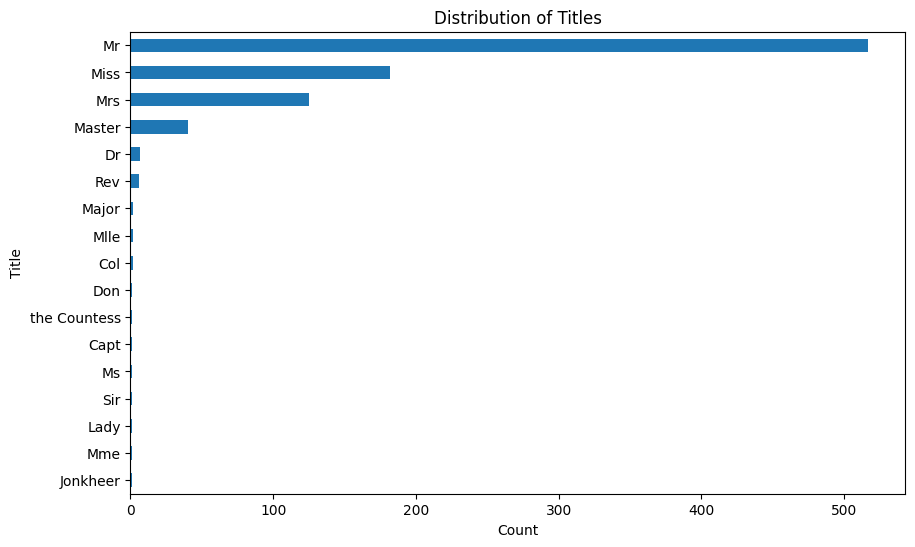

In [7]:
plt.figure(figsize=(10, 6))
train_data['Title'].value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


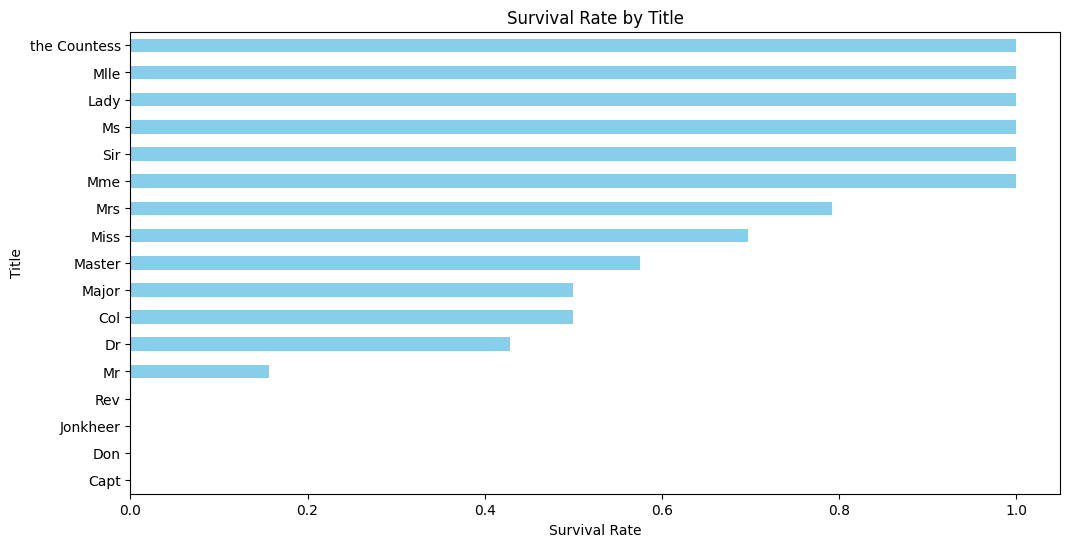

In [8]:
title_survival_rate = train_data.groupby('Title')['Survived'].mean()

print(title_survival_rate)

plt.figure(figsize=(12, 6))
title_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Title')
plt.xlabel('Survival Rate')
plt.ylabel('Title')
plt.show()

In [9]:
def get_titles(title):
    if title in ['Mme', 'Ms', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'the Countess']:
        return 'Miss'
    elif title in ['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir','Master']:
        return 'Rare'
    else:
        return title

In [10]:
train_data['Title'] = train_data['Title'].apply(get_titles)
test_data['Title'] = test_data['Title'].apply(get_titles)

In [11]:
train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')

In [12]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [13]:
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')

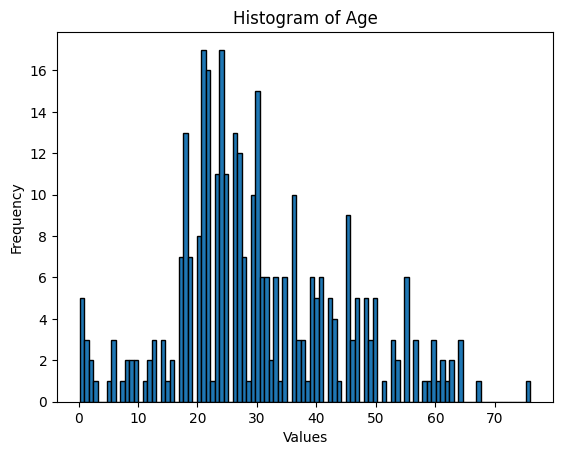

In [14]:
test_data['Age'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(col_x,key):
 sns.kdeplot(data=train_data[train_data[key] == 1], x=col_x, label='Survived', color='green', fill=True)
 sns.kdeplot(data=train_data[train_data[key] == 0], x=col_x, label='Not Survived', color='red', fill=True)

 plt.xlabel(col_x)
 plt.ylabel('Density')
 plt.title(f'Density Plot of {col_x} by {key}')
 plt.legend()

 plt.show()

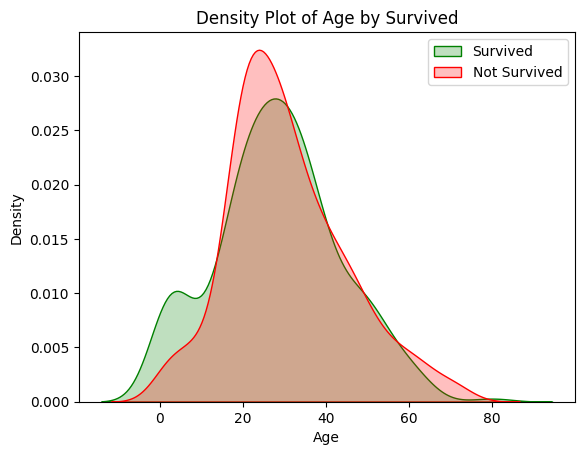

In [16]:
plot_distribution('Age','Survived')

In [17]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [18]:
bins_age = [0, 5, 10,15,20,25,30,35,40,50,60,70,100] 
labels_age = ['0-5','5-10','10-15','15-20','20-25', '25-30','30-35','35-40', '40-50','50-60','60-70','70-100']

In [19]:
train_data['Age_Category'] = pd.cut(train_data['Age'], bins=bins_age, labels=labels_age, right=True)
test_data['Age_Category'] = pd.cut(test_data['Age'], bins=bins_age, labels=labels_age, right=True)

In [20]:
age_survival_rate = train_data.groupby('Age_Category')['Survived'].mean()

print(age_survival_rate)


Age_Category
0-5       0.704545
5-10      0.350000
10-15     0.578947
15-20     0.343750
20-25     0.344262
25-30     0.329825
30-35     0.465909
35-40     0.417910
40-50     0.383721
50-60     0.404762
60-70     0.235294
70-100    0.200000
Name: Survived, dtype: float64


In [21]:
train_data = pd.get_dummies(train_data, columns=['Age_Category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Age_Category'], drop_first=True)

In [22]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [23]:
test_data['Fare'].dtype

dtype('float64')

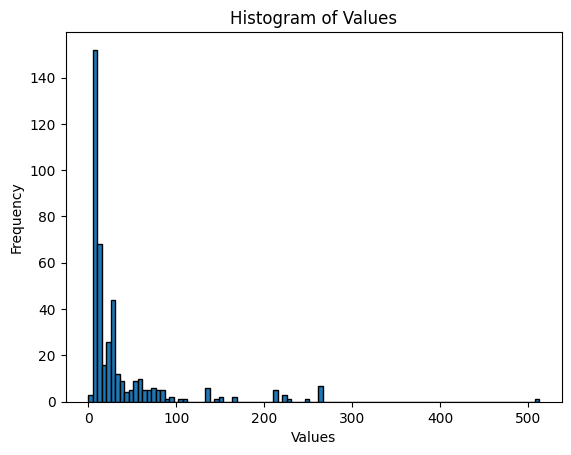

In [24]:
test_data['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [25]:
bins_fare = [0, 5,10,15, 20, 25, 30, 40, 50, 65,80, 100, 150,200,250,300, 600]
labels_fare = ['0-5', '5-10','10-15','15-20','20-25','25-30', '30-40', '40-50', '50-65','65-80','80-100','100-150', '150-200','200-250','250-300','300+']

train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)
test_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)


Fare_bin
0-5        0.062500
5-10       0.206250
10-15      0.388430
15-20      0.500000
20-25      0.404762
25-30      0.436170
30-40      0.437500
40-50      0.266667
50-65      0.651163
65-80      0.523810
80-100     0.869565
100-150    0.791667
150-200    0.666667
200-250    0.636364
250-300    0.666667
300+       1.000000
Name: Survived, dtype: float64


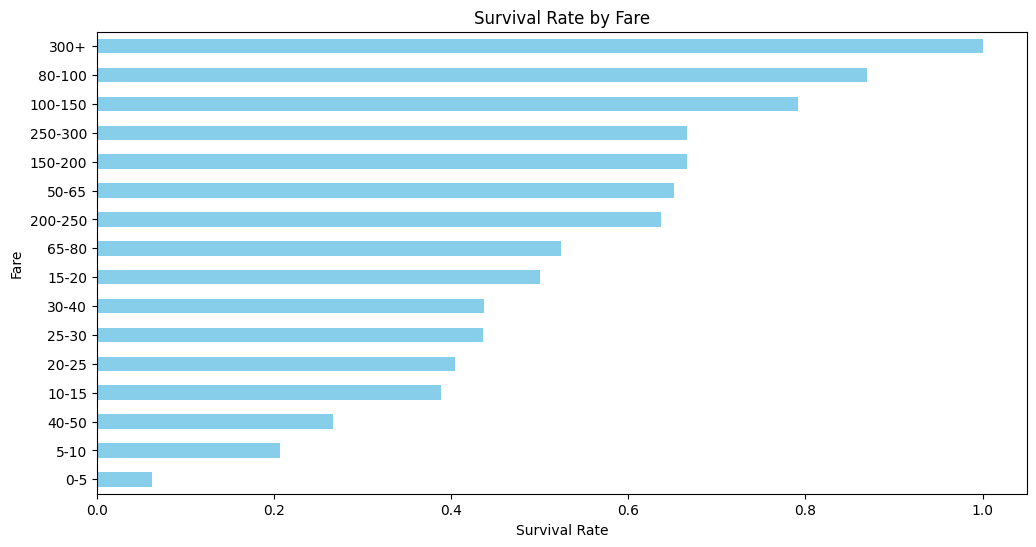

In [26]:
fare_survival_rate = train_data.groupby('Fare_bin')['Survived'].mean()

print(fare_survival_rate)

plt.figure(figsize=(12, 6))
fare_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Fare')
plt.xlabel('Survival Rate')
plt.ylabel('Fare')
plt.show()

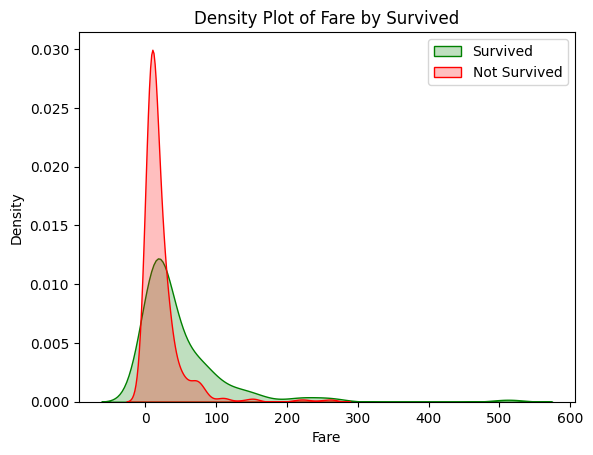

In [27]:
plot_distribution('Fare','Survived')

In [28]:
train_data = pd.get_dummies(train_data, columns=['Fare_bin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Fare_bin'], drop_first=True)

In [29]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  418 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 418 non-null    float64
 8   Cabin                91 non-null     object 
 9   Embarked             418 non-null    object 
 10  Title_Miss           418 non-null    uint8  
 11  Title_Mr             418 non-null    uint8  
 12  Title_Mrs            418 non-null    uint8  
 13  Title_Rare           418 non-null    uint8  
 14  Age_Category_5-10    418 non-null    uint8  
 15  Age_Category_10-15   418 non-null    uin

In [30]:
train_data['Cabin_ind'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_data['Cabin_ind'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [31]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')  # 'M' for Missing
test_data['Deck'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')

In [32]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  418 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 418 non-null    float64
 8   Embarked             418 non-null    object 
 9   Title_Miss           418 non-null    uint8  
 10  Title_Mr             418 non-null    uint8  
 11  Title_Mrs            418 non-null    uint8  
 12  Title_Rare           418 non-null    uint8  
 13  Age_Category_5-10    418 non-null    uint8  
 14  Age_Category_10-15   418 non-null    uint8  
 15  Age_Category_15-20   418 non-null    uin

In [33]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                            prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                           prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})

In [34]:
print(test_data['Ticket'])

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object


In [35]:
train_data['Ticket_prefix'] = train_data['Ticket'].apply(lambda x: str(x)[0:2])
test_data['Ticket_prefix'] = test_data['Ticket'].apply(lambda x: str(x)[0:2])

Ticket_prefix
11    0.568182
12    0.500000
13    0.727273
14    0.750000
16    0.800000
17    0.769231
19    0.687500
20    1.000000
21    0.000000
22    0.666667
23    0.444444
24    0.551724
25    0.500000
26    0.416667
27    0.750000
28    0.166667
29    0.642857
31    0.243243
32    0.000000
33    0.562500
34    0.143939
35    0.296296
36    0.347826
37    0.240000
38    0.200000
39    0.600000
41    0.222222
45    0.000000
54    0.000000
57    0.000000
65    0.250000
69    0.000000
72    0.000000
75    0.125000
84    0.000000
92    1.000000
A.    0.000000
A/    0.083333
A4    0.000000
C     0.400000
C.    0.464286
CA    0.071429
F.    0.666667
Fa    0.000000
LI    0.250000
P/    0.500000
PC    0.650000
PP    0.666667
S.    0.142857
SC    0.500000
SO    0.166667
ST    0.444444
SW    1.000000
W.    0.100000
W/    0.000000
WE    0.500000
Name: Survived, dtype: float64


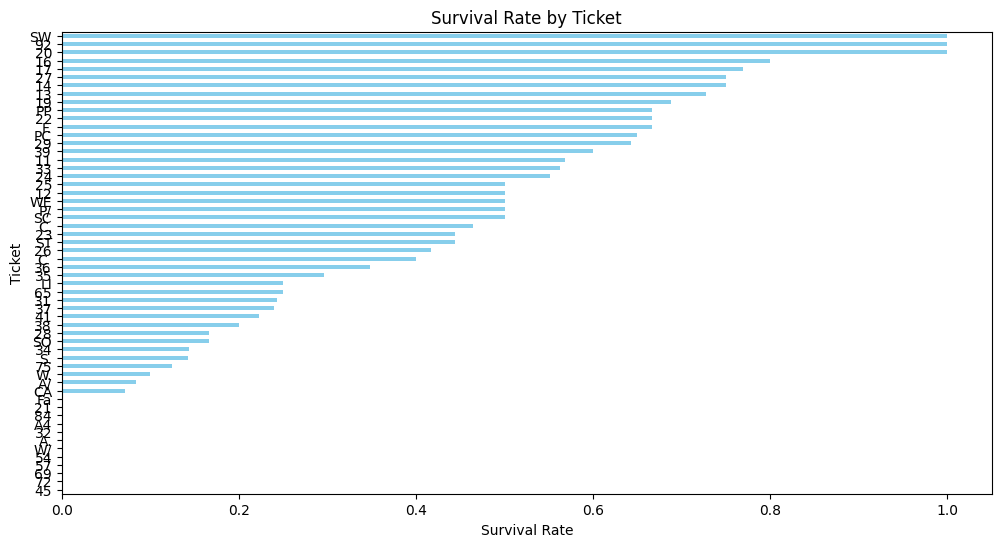

In [36]:
Ticket_prefix_survival_rate = train_data.groupby('Ticket_prefix')['Survived'].mean()

print(Ticket_prefix_survival_rate)

plt.figure(figsize=(12, 6))
Ticket_prefix_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Ticket')
plt.xlabel('Survival Rate')
plt.ylabel('Ticket')
plt.show()

In [37]:
train_data = pd.get_dummies(train_data, columns=['Ticket_prefix'], drop_first=True)

In [38]:
test_data = pd.get_dummies(test_data, columns=['Ticket_prefix'], drop_first=True)

In [39]:
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)

In [40]:
test_data = pd.get_dummies(test_data, columns=['Pclass'], drop_first=True)

In [41]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 95 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Age                  418 non-null    float64
 2   SibSp                418 non-null    int64  
 3   Parch                418 non-null    int64  
 4   Ticket               418 non-null    object 
 5   Fare                 418 non-null    float64
 6   Title_Miss           418 non-null    uint8  
 7   Title_Mr             418 non-null    uint8  
 8   Title_Mrs            418 non-null    uint8  
 9   Title_Rare           418 non-null    uint8  
 10  Age_Category_5-10    418 non-null    uint8  
 11  Age_Category_10-15   418 non-null    uint8  
 12  Age_Category_15-20   418 non-null    uint8  
 13  Age_Category_20-25   418 non-null    uint8  
 14  Age_Category_25-30   418 non-null    uint8  
 15  Age_Category_30-35   418 non-null    uin

In [42]:
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

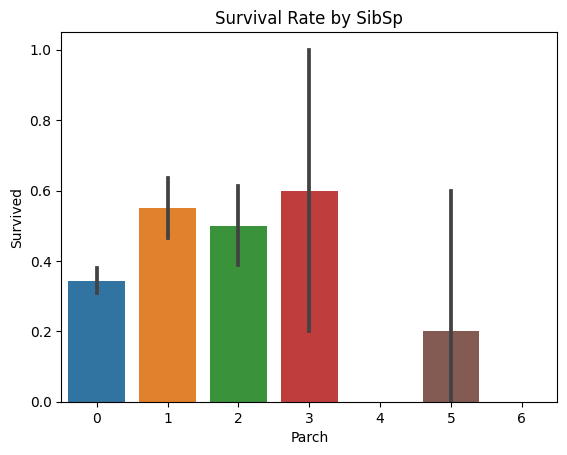

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by SibSp
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title('Survival Rate by SibSp')
plt.show()

In [44]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch']

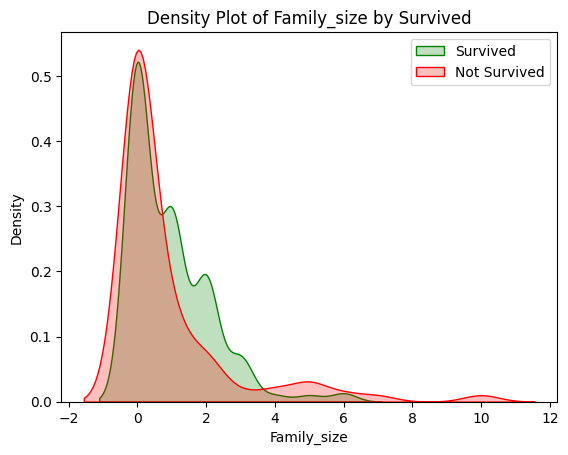

In [45]:
plot_distribution('Family_size','Survived')

In [46]:
bins_Familysize = [0,1,3,5,15]
labels_Familysize = ['solo', 'Small','Medium','Large']

train_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)
test_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)


In [47]:
train_data = pd.get_dummies(train_data, columns=['Familysize_Group'], drop_first=True)

In [48]:
test_data = pd.get_dummies(test_data, columns=['Familysize_Group'], drop_first=True)

In [49]:
train_data.drop('Family_size', axis=1, inplace=True)
test_data.drop('Family_size', axis=1, inplace=True)

In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 97 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              418 non-null    int64  
 1   Age                      418 non-null    float64
 2   SibSp                    418 non-null    int64  
 3   Parch                    418 non-null    int64  
 4   Fare                     418 non-null    float64
 5   Title_Miss               418 non-null    uint8  
 6   Title_Mr                 418 non-null    uint8  
 7   Title_Mrs                418 non-null    uint8  
 8   Title_Rare               418 non-null    uint8  
 9   Age_Category_5-10        418 non-null    uint8  
 10  Age_Category_10-15       418 non-null    uint8  
 11  Age_Category_15-20       418 non-null    uint8  
 12  Age_Category_20-25       418 non-null    uint8  
 13  Age_Category_25-30       418 non-null    uint8  
 14  Age_Category_30-35       4

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
train_data[['Fare', 'Age']] = scaler.fit_transform(train_data[['Fare', 'Age']])
test_data[['Fare', 'Age']] = scaler.transform(test_data[['Fare', 'Age']])

In [52]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)

In [53]:
y_train = train_data['Survived']

In [54]:
X_test = test_data.drop(['PassengerId'], axis=1)

In [55]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

In [56]:
missing_cols_test = train_columns - test_columns

In [57]:
missing_cols_test

{'Deck_T',
 'Ticket_prefix_14',
 'Ticket_prefix_27',
 'Ticket_prefix_45',
 'Ticket_prefix_54',
 'Ticket_prefix_57',
 'Ticket_prefix_84',
 'Ticket_prefix_A4',
 'Ticket_prefix_Fa',
 'Ticket_prefix_LI',
 'Ticket_prefix_P/',
 'Ticket_prefix_SW',
 'Ticket_prefix_W/',
 'Ticket_prefix_WE'}

In [58]:
for col in missing_cols_test:
    X_test[col] = 0

In [59]:
X_test = X_test[X_train.columns]

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 106 entries, Age to Familysize_Group_Large
dtypes: float64(2), int64(17), uint8(87)
memory usage: 97.7 KB


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 106 entries, Age to Familysize_Group_Large
dtypes: float64(2), int64(3), uint8(101)
memory usage: 122.8 KB


## Construct Decision Trees

In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [63]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Age_Category_5-10', 'Age_Category_10-15',
       ...
       'Ticket_prefix_ST', 'Ticket_prefix_SW', 'Ticket_prefix_W.',
       'Ticket_prefix_W/', 'Ticket_prefix_WE', 'Pclass_2', 'Pclass_3',
       'Familysize_Group_Small', 'Familysize_Group_Medium',
       'Familysize_Group_Large'],
      dtype='object', length=106)

In [64]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [65]:
print(X_train_split.isnull().sum().sum())  # Should be 0
print(y_train_split.isnull().sum())         # Should be 0

# Ensure correct types
print(type(X_train_split))  # Should be DataFrame or ndarray
print(type(y_train_split))  # Should be Series or ndarray

# Check dimensions
print(X_train_split.shape)  # Should be (n_samples, n_features)
print(y_train_split.shape) 


0
0
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(712, 106)
(712,)


In [119]:
param_grid = {
    'n_estimators': [50, 75,100,150,200],
    'max_depth': [6, 7, 8, 9,10],
    'learning_rate': [0.01, 0.03, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0.01, 0.1, 1] 
}

In [67]:
print(y_train_split.value_counts())

0    444
1    268
Name: Survived, dtype: int64


In [142]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

randomized_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=102),
    param_distributions=param_grid,
    n_iter=1000,  # Number of parameter settings sampled
    cv=6,
    n_jobs=-1,
    scoring='accuracy',
    random_state=44
)

randomized_search.fit(X_train_split, y_train_split)

RandomizedSearchCV(cv=6,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=102, ...),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.1],
                                        'max_depth': [6, 7, 8, 9, 10],
                                        'n_estimators': [50, 75, 100, 150, 200],
                                        'reg_lambda': [0.01, 0.1, 1],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=44, scoring='accuracy')

In [143]:

results = randomized_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

     mean_test_score  std_test_score  \
607         0.839956        0.040359   
194         0.837131        0.026577   
921         0.835731        0.030708   
904         0.835731        0.033283   
415         0.835731        0.033283   
..               ...             ...   
360         0.793607        0.033514   
253         0.792219        0.027209   
270         0.792207        0.023051   
986         0.790818        0.029568   
161         0.789382        0.026622   

                                                params  rank_test_score  
607  {'subsample': 0.8, 'reg_lambda': 0.1, 'n_estim...                1  
194  {'subsample': 0.7, 'reg_lambda': 1, 'n_estimat...                2  
921  {'subsample': 0.7, 'reg_lambda': 1, 'n_estimat...                3  
904  {'subsample': 0.7, 'reg_lambda': 1, 'n_estimat...                3  
415  {'subsample': 0.7, 'reg_lambda': 1, 'n_estimat...                3  
..                                                 ...              ...  
3

In [144]:
print("Best parameters:", randomized_search.best_params_)

Best parameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

stratified_kf = StratifiedKFold(n_splits=5)


randomized_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=102),
    param_distributions=param_grid,
    n_iter=1000,  # Number of parameter settings sampled
    cv=stratified_kf,
    n_jobs=-1,
    scoring='accuracy',
    random_state=44
)

randomized_search.fit(X_train_split, y_train_split)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           impor...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=102, ...),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.03, 0.1],
                                        'max_depth': [6, 7, 8, 9, 10],
                                        'n_estimators': [50, 75, 100, 150, 200],
                                        'reg_lambda': [0.01, 0.1, 1],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=44, scoring='accuracy')

In [128]:

results = randomized_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

     mean_test_score  std_test_score  \
774         0.846932        0.017235   
526         0.844115        0.011040   
505         0.842687        0.018691   
863         0.842677        0.018745   
901         0.842677        0.018745   
..               ...             ...   
709         0.804806        0.015868   
64          0.804738        0.023121   
141         0.804728        0.022777   
232         0.800621        0.019546   
470         0.796375        0.011253   

                                                params  rank_test_score  
774  {'subsample': 0.7, 'reg_lambda': 0.01, 'n_esti...                1  
526  {'subsample': 0.7, 'reg_lambda': 0.01, 'n_esti...                2  
505  {'subsample': 0.9, 'reg_lambda': 1, 'n_estimat...                3  
863  {'subsample': 0.7, 'reg_lambda': 0.01, 'n_esti...                4  
901  {'subsample': 0.7, 'reg_lambda': 1, 'n_estimat...                4  
..                                                 ...              ...  
7

In [129]:
print("Best parameters:", randomized_search.best_params_)

Best parameters: {'subsample': 0.7, 'reg_lambda': 0.01, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.2, 'colsample_bytree': 0.9}


In [146]:
final_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.03,
    colsample_bytree=0.9,
    subsample=0.7,
    random_state=102,
    reg_lambda=0.01,
    gamma=0.2
)

In [147]:
final_model.fit(X_train_split,y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=102, ...)

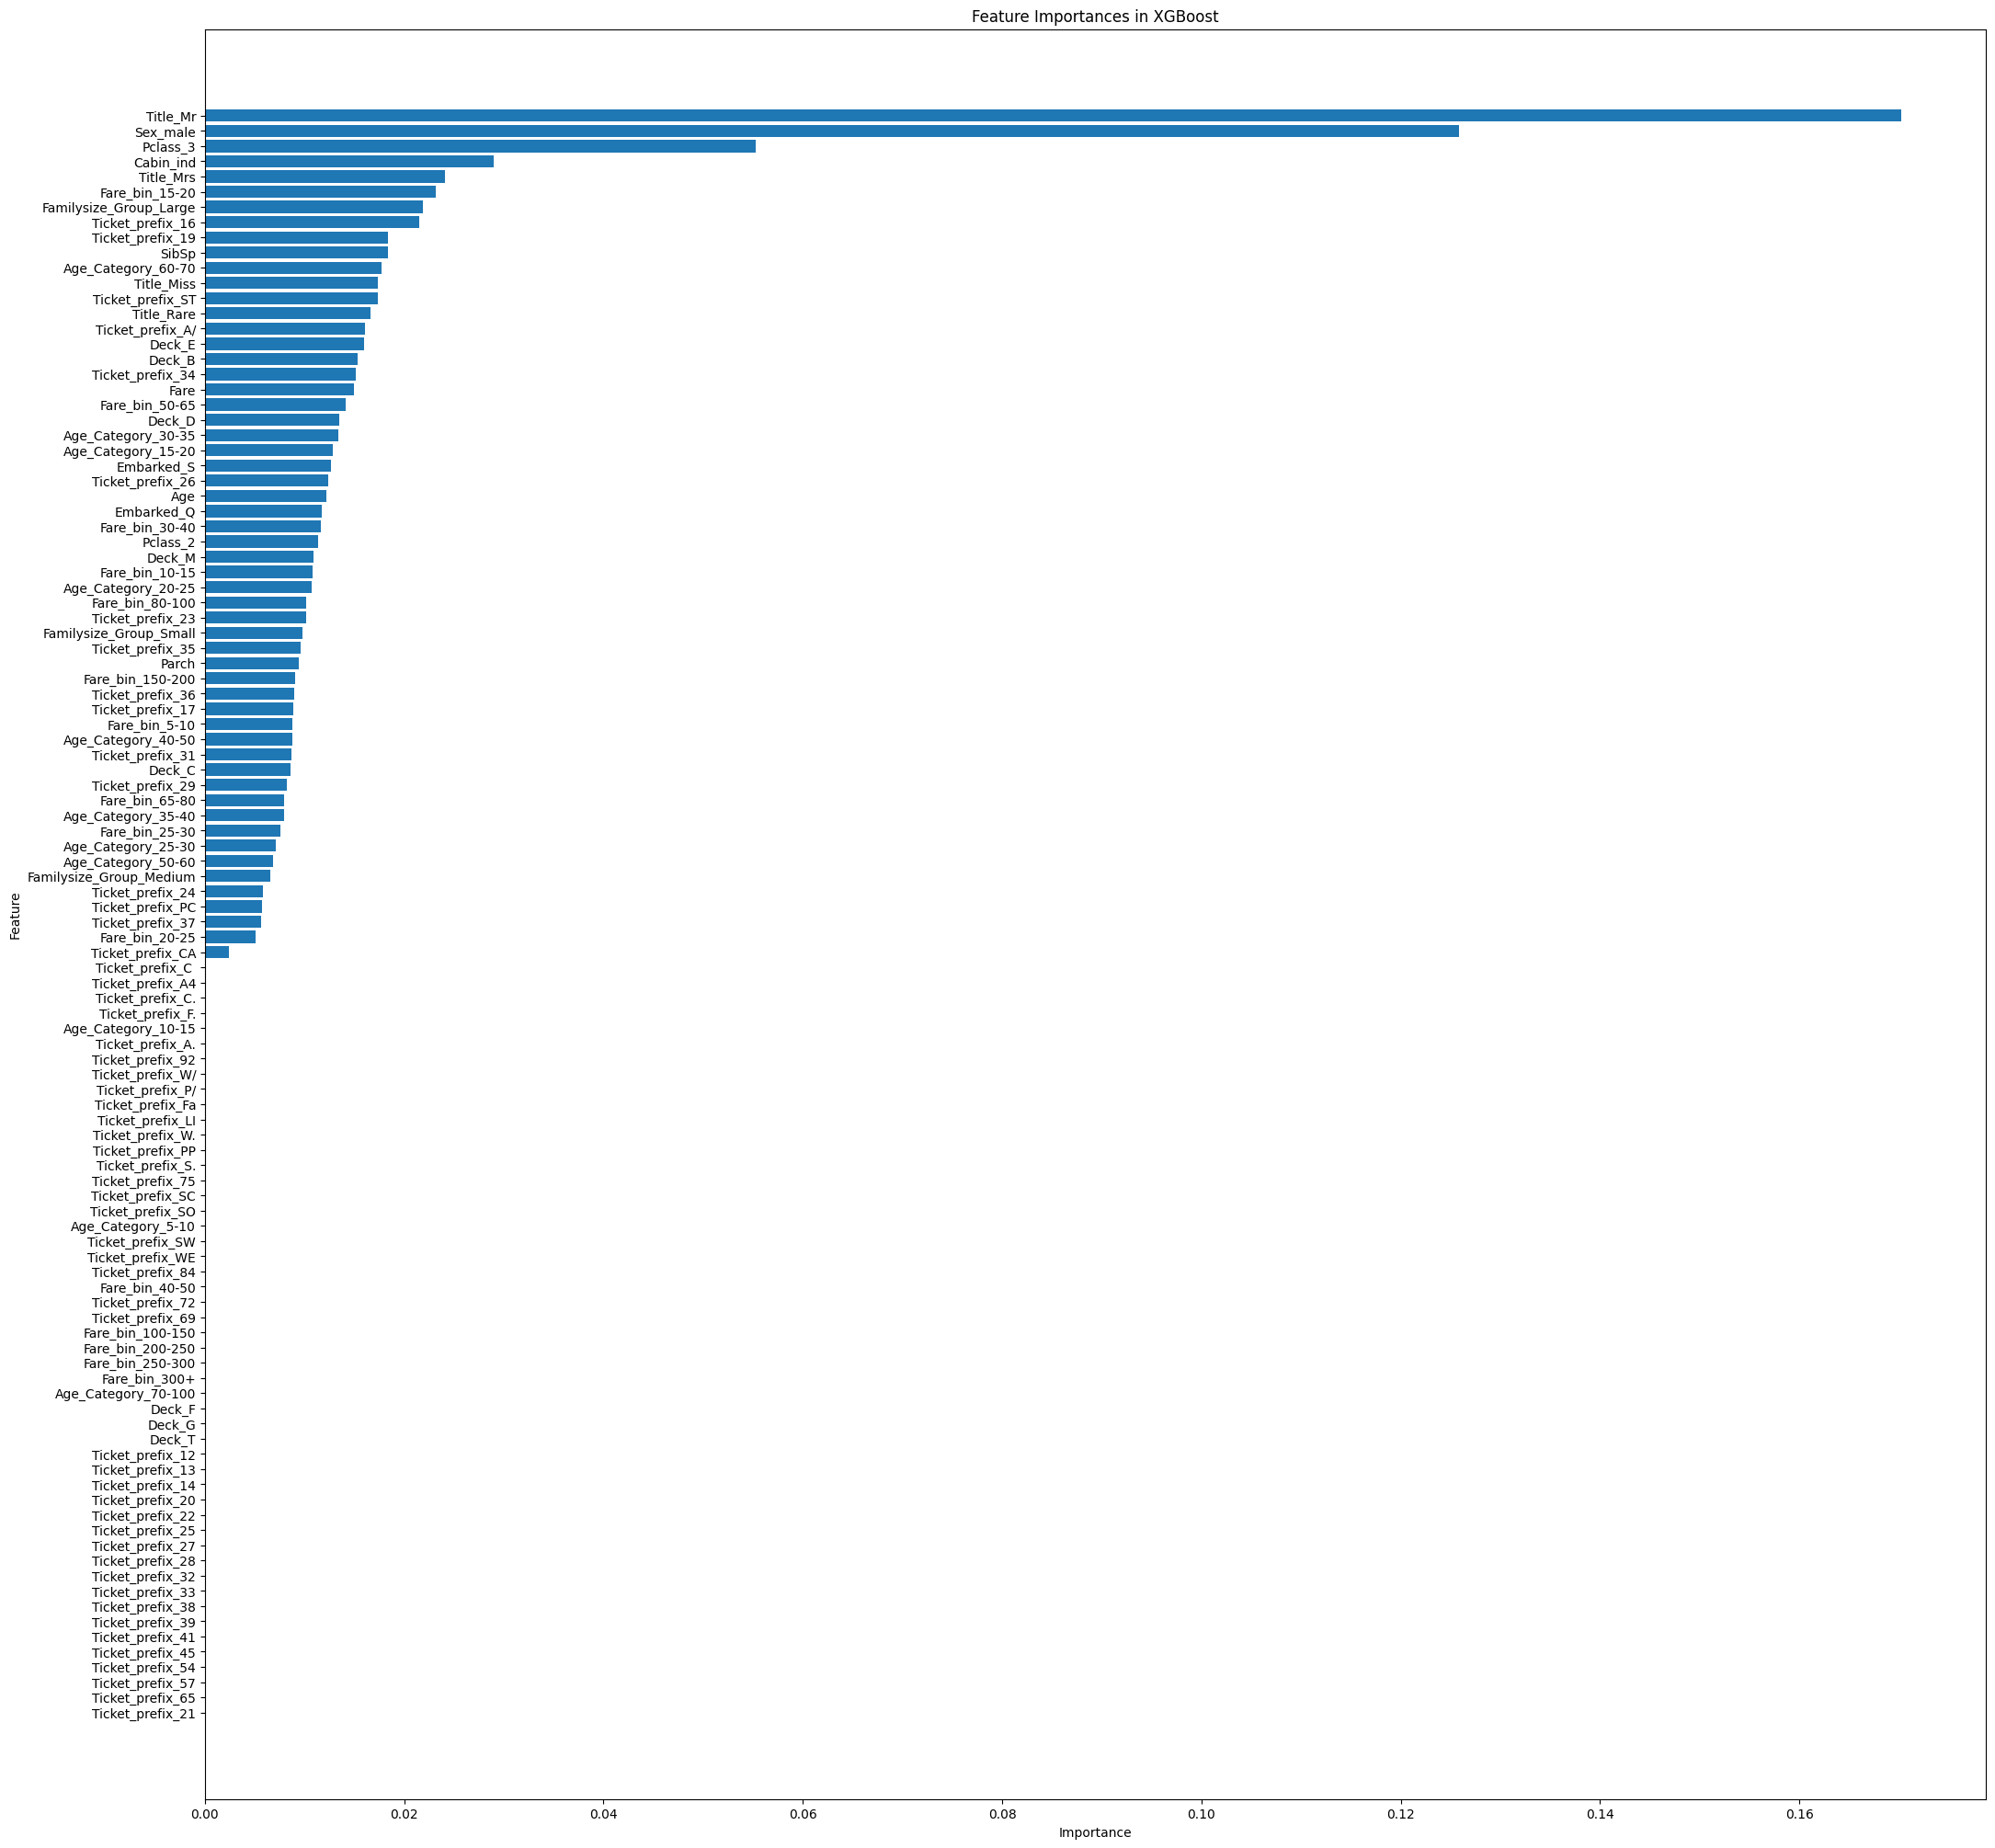

In [148]:
import matplotlib.pyplot as plt
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(25, 25))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [106]:

def get_tree_accuracy(n, depth, alpha, gamma, lambda_, colsample_, subsample_, X, Y):
    model = xgb.XGBClassifier(
        n_estimators=n,
        max_depth=depth,
        learning_rate=alpha,
        colsample_bytree=colsample_,
        subsample=subsample_,
        reg_lambda=lambda_,
        gamma=gamma,
        random_state=44
    )

    X_split, X_cv, y_split, y_cv = train_test_split(X, Y, test_size=0.2, random_state=42)
    model.fit(X_split, y_split)
    
    stratified_kf = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(model, X, Y, cv=stratified_kf, scoring='accuracy')
    
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")
    
    return cv_scores

In [108]:
get_tree_accuracy(50,6,0.03,0,0,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8328
Standard Deviation: 0.0300


array([0.82681564, 0.80898876, 0.88202247, 0.79775281, 0.84831461])

In [109]:
get_tree_accuracy(100,6,0.03,0,0,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8317
Standard Deviation: 0.0219


array([0.82681564, 0.81460674, 0.85955056, 0.80337079, 0.85393258])

In [110]:
get_tree_accuracy(100,7,0.03,0,0,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8350
Standard Deviation: 0.0247


array([0.83240223, 0.81460674, 0.87078652, 0.80337079, 0.85393258])

In [113]:
get_tree_accuracy(100,7,0.03,0.3,0.01,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8339
Standard Deviation: 0.0258


array([0.83240223, 0.80898876, 0.87078652, 0.80337079, 0.85393258])

In [118]:
get_tree_accuracy(200,7,0.03,0.3,0.01,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8339
Standard Deviation: 0.0195


array([0.84916201, 0.81460674, 0.83707865, 0.80898876, 0.85955056])

In [124]:
get_tree_accuracy(150,6,0.03,0,0.01,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8339
Standard Deviation: 0.0183


array([0.83240223, 0.82022472, 0.85955056, 0.80898876, 0.84831461])

In [125]:
get_tree_accuracy(150,7,0.03,0,0.01,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8373
Standard Deviation: 0.0207


array([0.83798883, 0.82022472, 0.86516854, 0.80898876, 0.85393258])

In [126]:
get_tree_accuracy(150,7,0.03,0.01,0.01,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8406
Standard Deviation: 0.0209


array([0.84357542, 0.8258427 , 0.85955056, 0.80898876, 0.86516854])

In [130]:
#n, depth, alpha, gamma, lambda_, colsample_, subsample_, X, Y)
get_tree_accuracy(100,6,0.03,0.2,0.01,0.9,0.7,X_train,y_train)

Mean Accuracy: 0.8361
Standard Deviation: 0.0239


array([0.83240223, 0.82022472, 0.87078652, 0.80337079, 0.85393258])

In [145]:
#n, depth, alpha, gamma, lambda_, colsample_, subsample_, X, Y)
get_tree_accuracy(75,6,0.1,0.1,0.1,0.8,0.8,X_train,y_train)

Mean Accuracy: 0.8328
Standard Deviation: 0.0238


array([0.84357542, 0.82022472, 0.85393258, 0.79213483, 0.85393258])

In [ ]:
Best parameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

In [ ]:
final_model = xgb.XGBClassifier(
    n_estimators=50,
    max_depth=6,
    learning_rate=0.03,
    colsample_bytree=0.9,
    subsample=0.7,
    random_state=102
)

In [ ]:
Best parameters: {'subsample': 0.7, 'reg_lambda': 0.01, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.2, 'colsample_bytree': 0.9}

In [101]:
final_model_01 = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.03,
    colsample_bytree=0.9,
    subsample=0.7,
    random_state=102
)

In [102]:
final_model_01.fit(X_train_split,y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=102, ...)

In [149]:
y_pred = final_model_01.predict(X_val)

In [104]:
accuracy = accuracy_score(y_val, y_pred)

In [150]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:")
print(cv_scores)

# Print mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-validation Scores:
[0.83798883 0.83146067 0.86516854 0.79775281 0.84831461]
Mean Accuracy: 0.8361
Standard Deviation: 0.0223


In [151]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=102, ...)

In [94]:
print(X_train.dtypes)
print(X_test.dtypes)

Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Title_Miss                   uint8
                            ...   
Pclass_2                     uint8
Pclass_3                     uint8
Familysize_Group_Small       uint8
Familysize_Group_Medium      uint8
Familysize_Group_Large       uint8
Length: 106, dtype: object
Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Title_Miss                   uint8
                            ...   
Pclass_2                     uint8
Pclass_3                     uint8
Familysize_Group_Small       uint8
Familysize_Group_Medium      uint8
Familysize_Group_Large       uint8
Length: 106, dtype: object


In [152]:
predictions = final_model.predict(X_test)

In [153]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [154]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction15.csv', index=False)

In [131]:
results_df.sort_values(by='rank_test_score').head(5)

,mean_test_score,std_test_score,params,rank_test_score
774,0.846932,0.017235,"{'subsample': 0.7, 'reg_lambda': 0.01, 'n_esti...",1
526,0.844115,0.011040,"{'subsample': 0.7, 'reg_lambda': 0.01, 'n_esti...",2
505,0.842687,0.018691,"{'subsample': 0.9, 'reg_lambda': 1, 'n_estimat...",3
863,0.842677,0.018745,"{'subsample': 0.7, 'reg_lambda': 0.01, 'n_esti...",4
901,0.842677,0.018745,"{'subsample': 0.7, 'reg_lambda': 1, 'n_estimat...",4


In [132]:
top_5_params =results_df.sort_values(by='rank_test_score').head(5)['params'].tolist()

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

base_models = [
    (f'xgb_model_{i}', XGBClassifier(**params, random_state=102))
    for i, params in enumerate(top_5_params)
]

In [134]:
meta_model = LogisticRegression()

In [135]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train_split, y_train_split)

accuracy = stacking_model.score(X_val, y_val)

In [136]:
accuracy

0.8324022346368715

In [137]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb_model_0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.9, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.2,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=Non...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.03, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=8,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=102, ...))],
                   final_estimator=LogisticRegression())

In [138]:
predictions = stacking_model.predict(X_test)

In [139]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 106 entries, Age to Familysize_Group_Large
dtypes: float64(2), int64(3), uint8(101)
memory usage: 122.8 KB


In [141]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction14.csv', index=False)

In [171]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [30, 40, 50, 75, 100, 200],
    'max_depth': [5, 6, 7, 8, 9, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=102)

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='accuracy')

grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)

RF_results = grid_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': RF_results['mean_test_score'],
    'std_test_score': RF_results['std_test_score'],
    'params': RF_results['params'],
    'rank_test_score': RF_results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

KeyboardInterrupt: 

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=40)
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
print("Selected features:", selected_features)

Selected features: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Age_Category_12-20', 'Age_Category_20-30',
       'Age_Category_30-40', 'Age_Category_40-50', 'Fare_bin_10-20',
       'Fare_bin_20-30', 'Fare_bin_30-40', 'Fare_bin_50-100', 'Cabin_ind',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_M', 'Ticket_prefix_16', 'Ticket_prefix_19',
       'Ticket_prefix_24', 'Ticket_prefix_26', 'Ticket_prefix_31',
       'Ticket_prefix_34', 'Ticket_prefix_35', 'Ticket_prefix_36',
       'Ticket_prefix_38', 'Ticket_prefix_A/', 'Ticket_prefix_PC',
       'Ticket_prefix_ST', 'Pclass_2', 'Pclass_3', 'Alone'],
      dtype='object')


In [99]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [100]:
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=9,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=40,
    max_features='sqrt',
    random_state=102
)


In [101]:
final_model.fit(X_train_split, y_train_split)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [102]:
y_pred = final_model.predict(X_val)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy on validation set: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[93 12]
 [16 58]]


In [104]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [105]:
predictions = final_model.predict(X_test)

In [107]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction7.csv', index=False)

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.327751
std,120.810458,0.469956
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.322967
std,120.810458,0.468170
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
